In [1]:
# import SVC
from pycaret.classification import *

import numpy as np

from sklearn.metrics import accuracy_score

# import train_test_split
from sklearn.model_selection import train_test_split,cross_val_predict
# import random forest
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier,StackingClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier,RandomTreesEmbedding
from sklearn.neighbors import KNeighborsClassifier
# import Decision Tree
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
# import standard scaler
from sklearn.preprocessing import StandardScaler

In [2]:
def custom_encoding(y):
    mapping = {"Standard":1,"Good":2,"Poor":0,"Bad":0,'NM':0,"No":1,"Yes":2}
    y = y.map(mapping)
    return y

In [59]:
df = pd.read_csv('../csv/credit_score_clean_extraction.csv')
# use os to store csv file

x = df.drop(['Credit_Score'],axis=1)
column = x.columns
y = custom_encoding(df["Credit_Score"])
print(y.head())
print(df.describe())

0    2
1    2
2    2
3    2
4    2
Name: Credit_Score, dtype: int64
                 Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  100000.000000  100000.000000          100000.000000      100000.000000   
mean       33.316340   50505.123449            4197.270835           5.368820   
std        10.764812   38299.422093            3186.432497           2.593314   
min        14.000000    7005.930000             303.645417           0.000000   
25%        24.000000   19342.972500            1626.594167           3.000000   
50%        33.000000   36999.705000            3095.905000           5.000000   
75%        42.000000   71683.470000            5957.715000           7.000000   
max        56.000000  179987.280000           15204.633333          11.000000   

       Num_Credit_Card  Interest_Rate    Num_of_Loan  Delay_from_due_date  \
count    100000.000000   100000.00000  100000.000000         100000.00000   
mean          5.533570       14.53208       3.53

In [46]:
def out_liar(column_data):
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lowerBand = Q1 - 1.5 * IQR
    upperBand = Q3 + 1.5 * IQR
    # number of outlier in column
    count_outliar = column_data[column_data > upperBand].count() + column_data[column_data < lowerBand].count()
    if count_outliar > 0:
        sns.boxplot(column_data)
        plt.title(column_data.name)
        # show number of outlier
        plt.text(0.8, 0.9, f"outliar: {count_outliar}", fontsize=12, transform=plt.gca().transAxes)
        plt.show()
        if count_outliar > 3000:
            column_data = column_data.apply(lambda x: upperBand if x > upperBand else lowerBand if x < lowerBand else x)
            return column_data
    return column_data

   


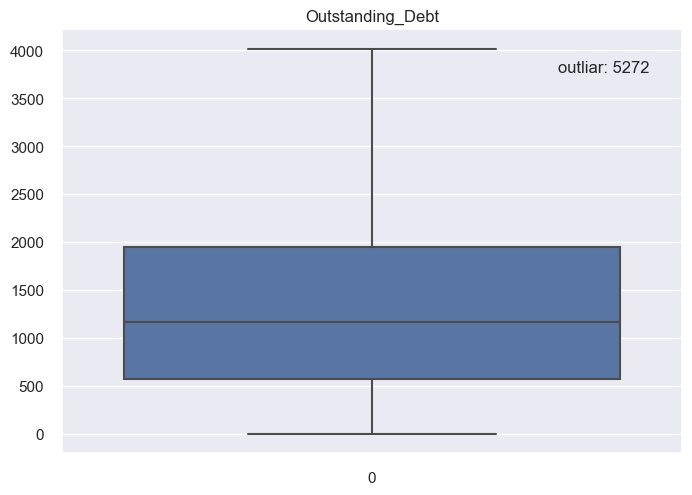

In [60]:
features=[
    "Interest_Rate",
    "Credit_History_Age",
    "Credit_Mix",
    'Type_of_Loan',
    "Interest_Loan_Interaction",
    "Outstanding_Debt",
    "Num_Credit_Card",
    "Net_Monthly_Savings",
]

for feature in features:
    x[feature] = out_liar(x[feature])

In [ ]:
features=[
    "Interest_Rate",
    "Credit_History_Age",
    "Credit_Mix",
    'Type_of_Loan',
    "Interest_Loan_Interaction",
    "Outstanding_Debt",
    "Num_Credit_Card",
    "Net_Monthly_Savings",
]
features_2 =[
    "Interest_Rate",
    "Credit_History_Age",
    "Credit_Mix",
    "Interest_Loan_Interaction",
    "Type_of_Loan" ,
    "Outstanding_Debt"
  ]

In [61]:
features=[
    "Interest_Rate",
    "Credit_History_Age",
    "Credit_Mix",
    'Type_of_Loan',
    "Interest_Loan_Interaction",
    "Outstanding_Debt",
    "Num_Credit_Card",
    "Net_Monthly_Savings",
]


scaler = StandardScaler()
X = x[features]
scaled_data = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)

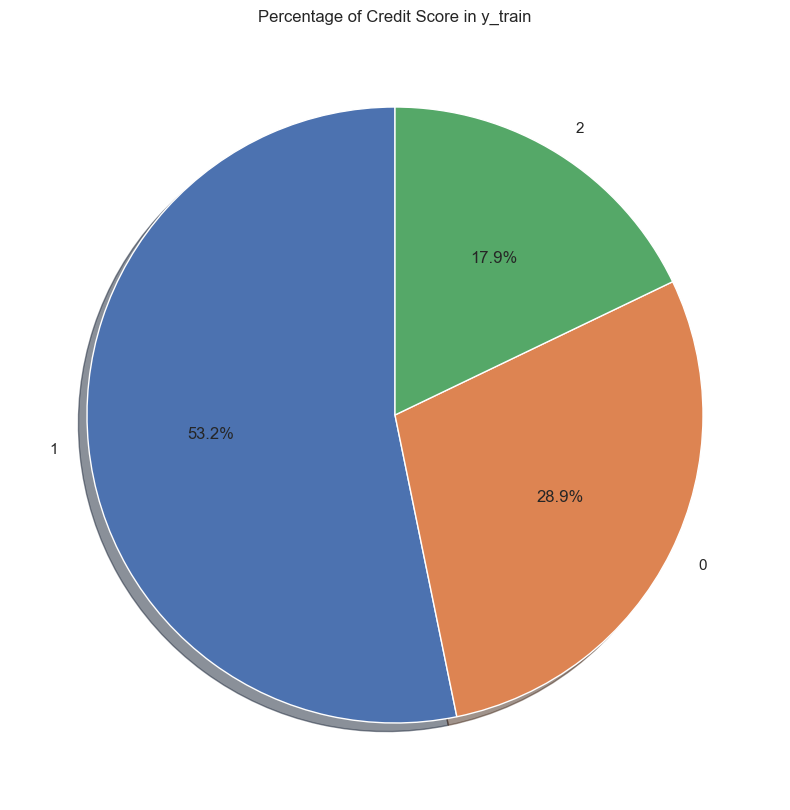

In [15]:
# plot percentage of y-train as pie chart
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,10))
plt.pie(y_train.value_counts(),labels=y_train.value_counts().index,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Percentage of Credit Score in y_train")
plt.show()


In [62]:
sm = SMOTE(k_neighbors=5)
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
des_tree = DecisionTreeClassifier(random_state=42)

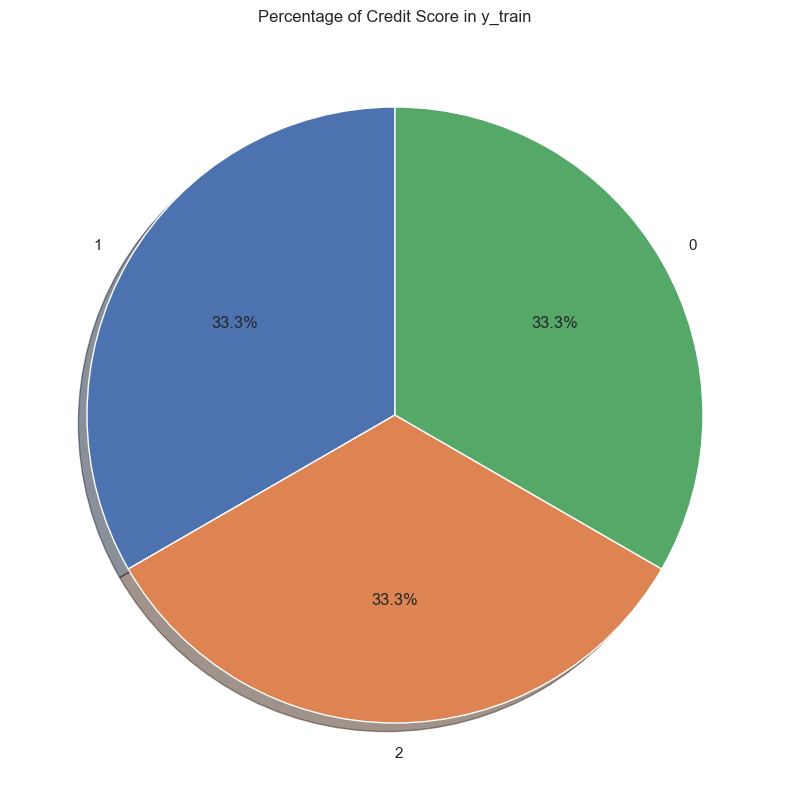

In [16]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,10))
plt.pie(y_train_sm.value_counts(),labels=y_train_sm.value_counts().index,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Percentage of Credit Score in y_train")
plt.show()

In [10]:
bagging_model = BaggingClassifier(base_estimator=rf_model, n_estimators=100, random_state=42)
ada_model = AdaBoostClassifier(base_estimator=rf_model, n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
hist_model = HistGradientBoostingClassifier(random_state=42)
random_tree_model = RandomTreesEmbedding(n_estimators=100, random_state=42)


In [14]:

ada_model.fit(x_train_sm, y_train_sm)
print("AdaBoost Accuracy: ", accuracy_score(y_test, ada_model.predict(x_test)))



: 

In [11]:
bagging_model.fit(x_train_sm, y_train_sm)
print("Bagging Accuracy: ", accuracy_score(y_test, bagging_model.predict(x_test)))


Bagging Accuracy:  0.83665


In [11]:
gb_model.fit(x_train_sm, y_train_sm)
print("Gradient Boosting Accuracy: ", accuracy_score(y_test, gb_model.predict(x_test)))

Gradient Boosting Accuracy:  0.67075


In [12]:

hist_model.fit(x_train_sm, y_train_sm)
print("Hist Gradient Boosting Accuracy: ", accuracy_score(y_test, hist_model.predict(x_test)))

Hist Gradient Boosting Accuracy:  0.7068


In [63]:
rf_model.fit(x_train_sm, y_train_sm)
et_model.fit(x_train_sm, y_train_sm)
knn_model.fit(x_train_sm, y_train_sm)
des_tree.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(random_state=42)

In [64]:
rf_predictions = rf_model.predict(x_test)
et_predictions = et_model.predict(x_test)
knn_predictions = knn_model.predict(x_test)
des_predictions = des_tree.predict(x_test)

In [65]:
ensemble_model = VotingClassifier(estimators=[
    ('Random Forest', rf_model),
    ('Extra Trees', et_model),
    ("Decision Tree", des_tree),
    ("KNN", knn_model)
], voting='hard',weights=[1,1,1,1])

In [66]:
ensemble_model.fit(x_train_sm, y_train_sm)

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(random_state=42)),
                             ('Extra Trees',
                              ExtraTreesClassifier(random_state=42)),
                             ('Decision Tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('KNN', KNeighborsClassifier())],
                 weights=[1, 1, 1, 1])

In [67]:
ensemble_predictions = ensemble_model.predict(x_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Ensemble Model Accuracy: {ensemble_accuracy}")

Ensemble Model Accuracy: 0.84265


In [89]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
et_accuracy = accuracy_score(y_test, et_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
des_accuracy = accuracy_score(y_test, des_predictions)


print(f"Random Forest Classifier Accuracy: {rf_accuracy}")
print(f"Extra Trees Classifier Accuracy: {et_accuracy}")
print(f"KNN Classifier Accuracy: {knn_accuracy}")
print(f"Ensemble Model Accuracy: {ensemble_accuracy}")
print(f"Decision Tree Accuracy: {des_accuracy}")





Random Forest Classifier Accuracy: 0.8399
Extra Trees Classifier Accuracy: 0.8395
KNN Classifier Accuracy: 0.8065
Ensemble Model Accuracy: 0.84265
Decision Tree Accuracy: 0.828


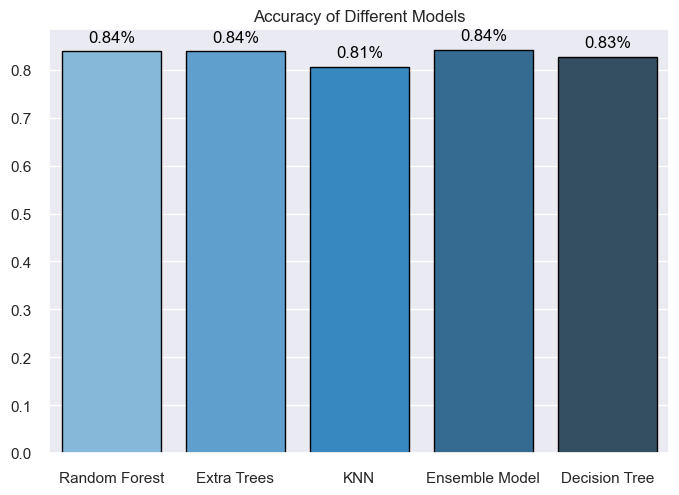

In [117]:
res_plot = pd.DataFrame({
    "Random Forest": [rf_accuracy],
    "Extra Trees": [et_accuracy],
    "KNN": [knn_accuracy],
    "Ensemble Model": [ensemble_accuracy],
    "Decision Tree": [des_accuracy]
}, index=["Accuracy"])
sns.set_theme(style="darkgrid")
sns.barplot(data=res_plot, palette="Blues_d", linewidth=1, edgecolor="black", saturation=1)
# add text to barplot
for p in plt.gca().patches:
    plt.gca().annotate(
        f"{round(p.get_height()+.00001 * 100, 2)}%",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="center",
        fontsize=12,
        color="black",
        xytext=(0, 10),
        textcoords="offset points",
    )
plt.title("Accuracy of Different Models")
plt.show()


In [72]:
cross_val_rf = cross_val_predict(rf_model, x_train_sm, y_train_sm, cv=10)
cross_val_et = cross_val_predict(et_model, x_train_sm, y_train_sm, cv=10)
cross_val_knn = cross_val_predict(knn_model, x_train_sm, y_train_sm, cv=10)
cross_val_des = cross_val_predict(des_tree, x_train_sm, y_train_sm, cv=10)
cross_val_ensemble = cross_val_predict(ensemble_model, x_train_sm, y_train_sm, cv=10)

print(f"Random Forest Classifier Accuracy: {accuracy_score(y_train_sm, cross_val_rf)}")
print(f"Extra Trees Classifier Accuracy: {accuracy_score(y_train_sm, cross_val_et)}")
print(f"KNN Classifier Accuracy: {accuracy_score(y_train_sm, cross_val_knn)}")
print(f"Ensemble Model Accuracy: {accuracy_score(y_train_sm, cross_val_ensemble)}")
print(f"Decision Tree Accuracy: {accuracy_score(y_train_sm, cross_val_des)}")

Random Forest Classifier Accuracy: 0.8844470542180466
Extra Trees Classifier Accuracy: 0.8850890585241731
KNN Classifier Accuracy: 0.8681307496574672
Ensemble Model Accuracy: 0.8857310628302995
Decision Tree Accuracy: 0.8685065570561754


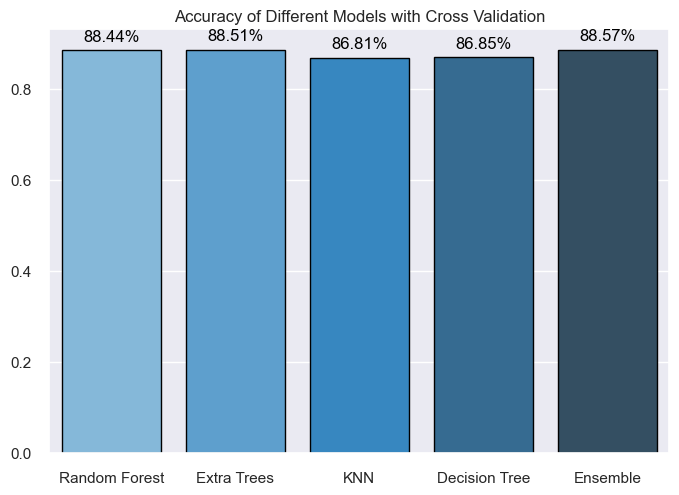

In [132]:
res_plot_vol = pd.DataFrame({
    "Random Forest": [accuracy_score(y_train_sm, cross_val_rf)],
    "Extra Trees": [accuracy_score(y_train_sm, cross_val_et)],
    "KNN": [accuracy_score(y_train_sm, cross_val_knn)],
    "Decision Tree": [accuracy_score(y_train_sm, cross_val_des)],
    "Ensemble": [accuracy_score(y_train_sm, cross_val_ensemble)]
})
sns.set_theme(style="darkgrid")
sns.barplot(data=res_plot_vol, palette="Blues_d", linewidth=1, edgecolor="black", saturation=1)
# add text to barplot
for p in plt.gca().patches:
    plt.gca().annotate(
        f"{round(p.get_height() * 100, 2)}%",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="center",
        fontsize=12,
        color="black",
        xytext=(0, 10),
        textcoords="offset points",
    )
plt.title("Accuracy of Different Models with Cross Validation")
plt.show()



In [ ]:
classifiy = {
   "Age":0.83015,
   "Annual_Income":0.8319,
   "Monthly_Inhand_Salary":0.83195,
   "Num_Bank_Accounts":0.8315,
   "Credit_Utilization":0.8227,
   "Net_Monthly_Savings":0.8323,
   "Amount_invested_monthly":0.83175,
   "Total_EMI_per_month":0.8311,
   "Payment_of_Min_Amount":0.8313,
   "Num_Credit_Inquiries":0.8302,
   "Changed_Credit_Limit":0.81965,
   "Num_of_Delayed_Payment":0.8209,
   "Delay_from_due_date":0.8223,
   "Num_of_Loan":0.8314,
   "Payment_Behaviour":0.80715,
   "Monthly_Balance":0.81445,
   "Debt_to_Income_Ratio":0.8316,
   "EMI_to_Income_Ratio":0.83115,
   "Investment_to_Income_Ratio":0.8317,
   "Loan_to_Income_Ratio":0.8318,
   "Total_Financial_Obligations":0.83105,
}
print(classifiy) 


{'Age': 0.83015, 'Annual_Income': 0.8319, 'Monthly_Inhand_Salary': 0.83195, 'Num_Bank_Accounts': 0.8315, 'Credit_Utilization': 0.8227, 'Net_Monthly_Savings': 0.8323, 'Amount_invested_monthly': 0.83175, 'Total_EMI_per_month': 0.8311, 'Payment_of_Min_Amount': 0.8313, 'Num_Credit_Inquiries': 0.8302, 'Changed_Credit_Limit': 0.81965, 'Num_of_Delayed_Payment': 0.8209, 'Delay_from_due_date': 0.8223, 'Num_of_Loan': 0.8314, 'Payment_Behaviour': 0.80715, 'Monthly_Balance': 0.81445, 'Debt_to_Income_Ratio': 0.8316, 'EMI_to_Income_Ratio': 0.83115, 'Investment_to_Income_Ratio': 0.8317, 'Loan_to_Income_Ratio': 0.8318, 'Total_Financial_Obligations': 0.83105}
